# 2021/11/2
# 使用垂直积分MSE的数据来绘制逐侯的整层MSE变化

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

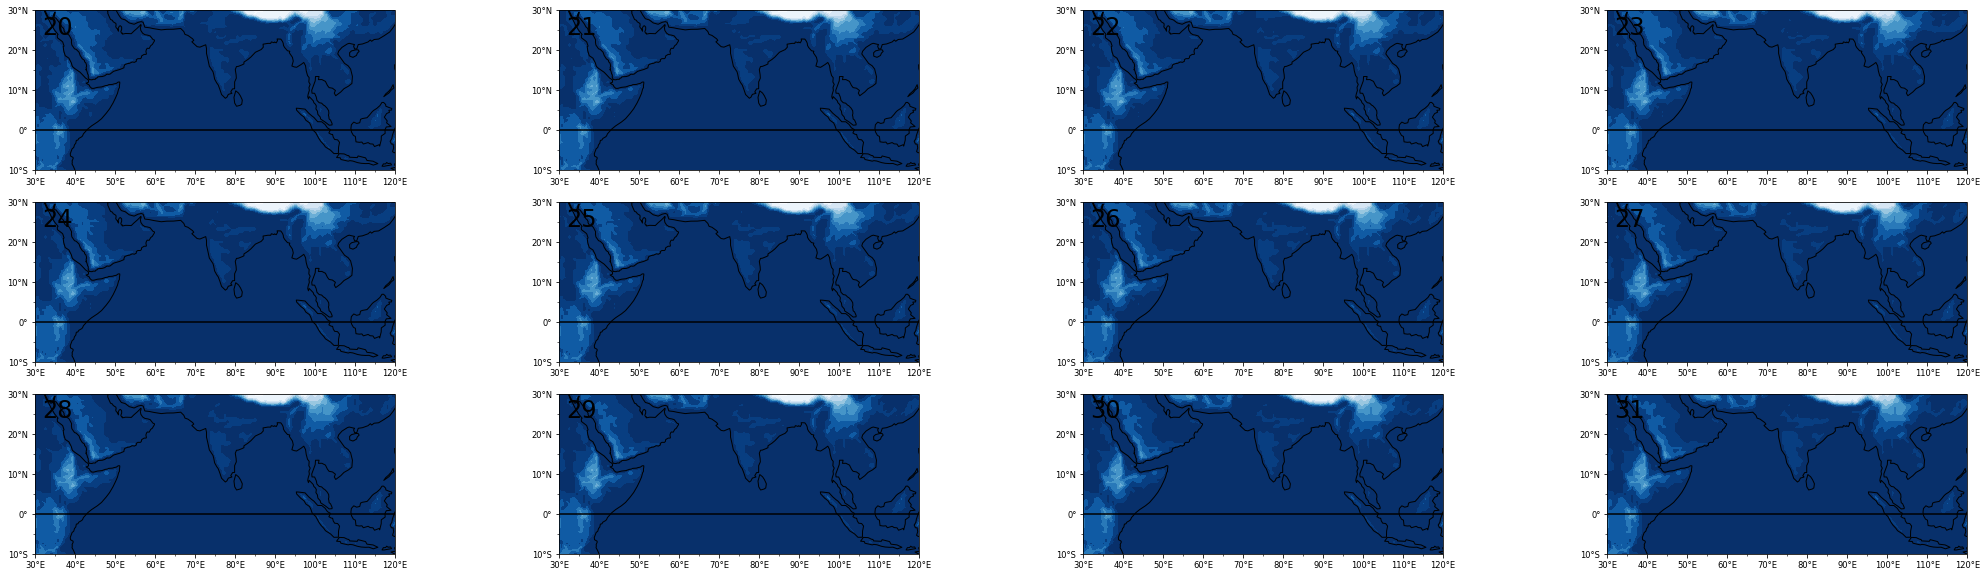

In [6]:
f  =  xr.open_dataset("/home/sun/data/merra2_integrated_mse.nc").sel(lat=slice(-10,30),lon=slice(30,120))

'''设置绘图区域'''
lonmin,lonmax,latmin,latmax  =  30,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]
tmin,tmax  =  20,31 

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(36,10))
spec1   =  fig1.add_gridspec(nrows=3,ncols=4)

j = 0
for row in range(3):
    for col in range(4):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
        ax.set_extent(extent, crs=proj)
        
        im  =  ax.contourf(f.lon,f.lat,f.integrated_mse.data[j+tmin,:],levels =10,cmap='Blues',alpha=1,extend='both')
        ax.plot([30,120],[0,0],color='k')

        ax.text(0.02,0.85,str(j+20),transform=ax.transAxes,fontsize=24)
    
        j += 1

!mkdir -p /home/sun/paint/mse
plt.savefig('/home/sun/paint/mse/integrated_mse_merra2.pdf', bbox_inches='tight',dpi=1200)
plt.show()

In [3]:
f.integrated_mse.data[23,:,100]

array([29815.87486518, 29817.8297749 , 29819.3045885 , 29820.33194804,
       29821.1629195 , 29821.59333267, 29821.94705605, 29822.09749281,
       29821.78174373, 29821.30422602, 29820.95332154, 29820.51760025,
       29819.88477314, 29819.33691618, 29819.35124579, 29819.43663694,
       29819.71980665, 29819.87498302, 29819.70318472, 29819.61541894,
       29819.81841548, 29820.10343527, 29820.49766129, 29821.05002808,
       29821.39019096, 29822.04838009, 29822.67305519, 29824.26826562,
       29826.14116571, 29827.62518874, 29829.24860163, 29831.07958219,
       29832.72123245, 29834.53854782, 29836.44714387, 29451.54233981,
       29452.91648413, 29454.3720411 , 29455.9249649 , 29457.65542319,
       29459.4737237 , 29462.045058  , 29463.56965575, 29465.39019369,
       29466.20518   , 29466.85056252, 29467.36327903, 29467.14396301,
       29466.92321793, 29466.45981323, 29465.34112703, 29463.76899755,
       29461.79305448, 29459.34833347, 29456.06973181, 29451.70907789,
      

In [4]:
f.lon.data[100]

92.5